In [193]:

import pandas as pd
import mne

df1 = pd.read_csv('thumbkanan.csv', delimiter=';')
df2 = pd.read_csv('thumbkiri.csv', delimiter=';')

df = pd.concat([df1, df2], ignore_index=True)
df.head()

,CH1,CH2,CH3,CH4,Vbat,Trigger,AccX,AccY,AccZ,GyX,GyY,GyZ,N,fs,Timestamp,label
0,"-856,7393726","-1379,615753","-1243,650044","-1226,053573",3922,0,-6555,1565,-15087,45,189,-10,1969067,500,17:36:01.908436,THUMB
1,"-1711,0627","-2317,7719","-2101,123868","-2114,70681",3922,0,-6555,1565,-15087,45,189,-10,1969068,500,17:36:01.908448,THUMB
2,"-1275,281325","-1615,348696","-1490,520772","-1763,323714",3922,0,-6555,1565,-15087,45,189,-10,1969069,500,17:36:01.908455,THUMB
3,"-539,2776621","-771,5926692","-751,7383821","-1012,642512",3922,0,-6555,1565,-15087,45,189,-10,1969070,500,17:36:01.908462,THUMB
4,"91,33131186","-30,30611112","-97,48871404","-319,8575058",3922,0,-6619,1570,-15098,69,176,-82,1969071,500,17:36:01.908469,THUMB


In [194]:
column = ["CH1","CH2", 	"CH3",	"CH4"]

df = df[column]

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace(',', '.', regex=False) 

# Drop any rows with NaN values
df = df.dropna()
# df = df.drop("label", axis=1)
df.head()

,CH1,CH2,CH3,CH4
0,-856.7393726,-1379.615753,-1243.650044,-1226.053573
1,-1711.0627,-2317.7719,-2101.123868,-2114.70681
2,-1275.281325,-1615.348696,-1490.520772,-1763.323714
3,-539.2776621,-771.5926692,-751.7383821,-1012.642512
4,91.33131186,-30.30611112,-97.48871404,-319.8575058


In [195]:
# scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = scaler.fit_transform(df)


Creating RawArray with float64 data, n_channels=4, n_times=20118
    Range : 0 ... 20117 =      0.000 ...    40.234 secs
Ready.


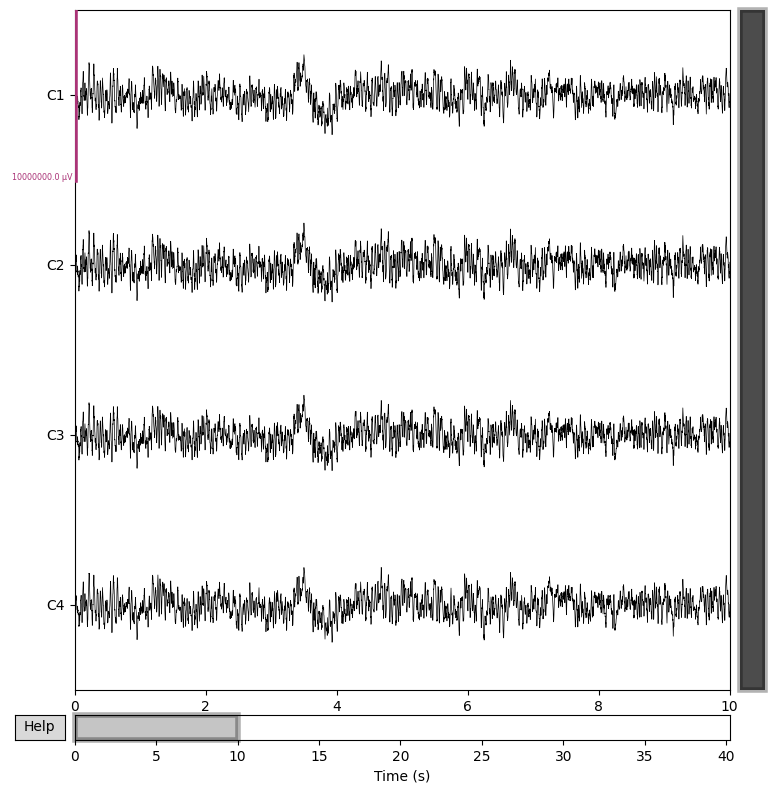

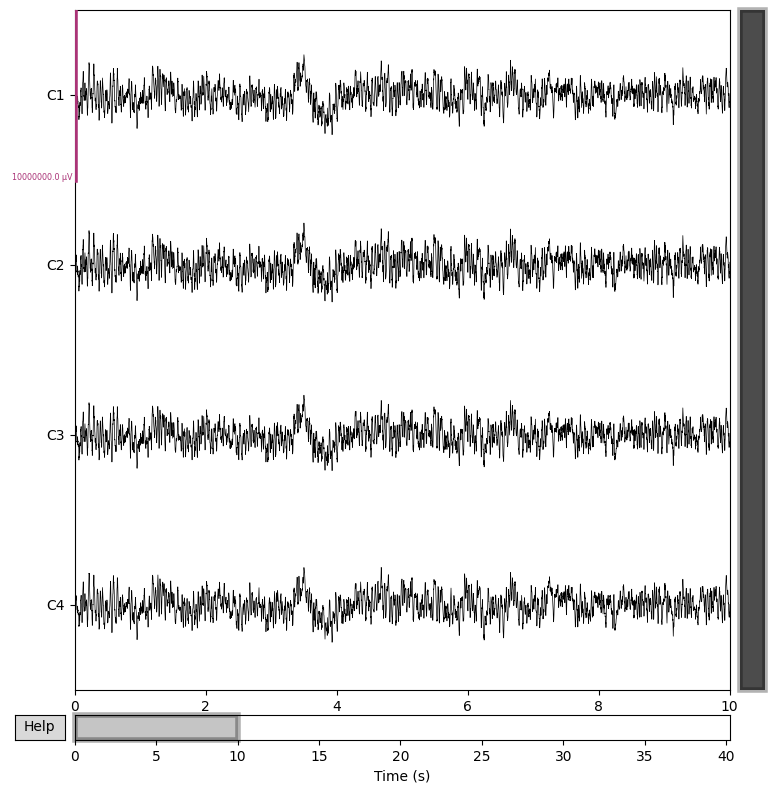

In [196]:
#define info EEG RAW
sfreq = 500
ch_types = ["eeg", "eeg", "eeg", "eeg"]
ch_names = ["C1","C2","C3","C4"]
montage = mne.channels.make_standard_montage("standard_1020")
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
info.set_montage(montage)

# Create RawArray
data = df.T
raw = mne.io.RawArray(data, info)
raw.plot(n_channels=4, scalings=5, show=True, block=True)



In [197]:
raw.info

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,7 points
Good channels,4 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,500.00 Hz
Highpass,0.00 Hz
Lowpass,250.00 Hz


In [198]:
total_duration = raw.times[-1]  # Mengambil waktu terakhir dari raw data

# add anotations every 1 second of total duration data
onset = [i for i in range(0, int(total_duration), 1)]
duration = [1] * len(onset)
description = ['thumb'] * len(onset)

annotations = mne.Annotations(onset=onset, duration=duration, description=description)
raw.set_annotations(annotations)

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,7 points
Good channels,4 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,500.00 Hz
Highpass,0.00 Hz
Lowpass,250.00 Hz


In [199]:
events, _ = mne.events_from_annotations(raw)
print(events)

Used Annotations descriptions: ['thumb']
[[    0     0     1]
 [  500     0     1]
 [ 1000     0     1]
 [ 1500     0     1]
 [ 2000     0     1]
 [ 2500     0     1]
 [ 3000     0     1]
 [ 3500     0     1]
 [ 4000     0     1]
 [ 4500     0     1]
 [ 5000     0     1]
 [ 5500     0     1]
 [ 6000     0     1]
 [ 6500     0     1]
 [ 7000     0     1]
 [ 7500     0     1]
 [ 8000     0     1]
 [ 8500     0     1]
 [ 9000     0     1]
 [ 9500     0     1]
 [10000     0     1]
 [10500     0     1]
 [11000     0     1]
 [11500     0     1]
 [12000     0     1]
 [12500     0     1]
 [13000     0     1]
 [13500     0     1]
 [14000     0     1]
 [14500     0     1]
 [15000     0     1]
 [15500     0     1]
 [16000     0     1]
 [16500     0     1]
 [17000     0     1]
 [17500     0     1]
 [18000     0     1]
 [18500     0     1]
 [19000     0     1]
 [19500     0     1]]


In [200]:
# save raw
raw.save("thumb.fif", overwrite=True)

Writing d:\UGM\Capstone\TESTING\thumb.fif
Closing d:\UGM\Capstone\TESTING\thumb.fif
[done]


C:\Users\FARHAN FRANAKA\AppData\Local\Temp\ipykernel_16964\2582610963.py:2: RuntimeWarning: This filename (d:\UGM\Capstone\TESTING\thumb.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save("thumb.fif", overwrite=True)
